# Practice General Relativity and Cosmology with Sympy

## Goal

Exercises for general relativity and cosmology.
1. We start with Sympy exercises to get familiar with (analytical) tensor calculus.
2. we move on to calculating geodesics in polar coordinates and spherical coordinate.
3. Finally we implement numerical solvers to calculate geodesics in 4D-spacetime using the metric tensor, connection coefficients (Christoffel symbols), Riemann tensor, and the geodesic equation.

In [49]:
import sympy as sp
from typing import Sequence
sp.init_printing(fontsize="10pt", backcolor="white")

## Sympy Exercises

### Exercise 1

Goal: to learn how we can make symbolic expressions with Sympy.

- Define x,y, and a as symbolic variables.
- Define the expression f(x,y) = ax^2 + sin(xy)
- Print the expression f(x,y)
- Replace a with 2 and print the new expression.

In [50]:
a, x, y = sp.symbols("a x y")
f = a * x**2 * y + sp.sin(x * y)

f

In [51]:
f_sub = f.subs(a, 2)
f_sub

### Exercise 2

Goal: compute partial derivatives and simplify the results.

- Compute ∂f/∂x.
- Compute ∂f/∂y.
- Take the derivative of ∂f/∂xonce more with respect to x.
- Simplify all results as much as possible.
- Check whether two algebraically equivalent expressions are indeed equal using SymPy.



In [52]:
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
d2f_dx2 = sp.diff(df_dx, x)

df_dx

In [53]:
df_dy

In [54]:
d2f_dx2

In [55]:
# These should be equivalent expressions
df_dx_s = sp.simplify(df_dx)
sp.simplify(df_dx - df_dx_s) == 0


True

### Exercise 3

Goal: create and manipulate matrices with symbolic elements.

We define the vector: 

$\vec{v} = \begin{bmatrix}
     x^2 \\
     xy \\
     sin(y)
     \end{bmatrix}$

and the 2x2 matrix

$\overline{\overline{M}} = \begin{bmatrix}
     x, y \\
     y, x
     \end{bmatrix}$

- Compute the matrix-vector product Mv using only the first two components of v.
- Compute the determinant of M and the inverse of M symbolically.

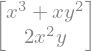

In [56]:
v = sp.Matrix([x**2, x*y, sp.sin(y)])
m = sp.Matrix([[x,y],[y,x]])

prod = m * v[:2, :]
prod

In [57]:
m.det()

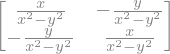

In [58]:
m.inv()

### Exercise 4

Goal: differentiate matrices and vectors

- Take the derivative of each element of M with respect to x.
- Take the derivative of the vector v with respect to y.
- Check the difference between:  
    element-wise differentiation  
    differentiation using SymPy’s matrix methods  



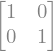

In [59]:
# Derivative of each matrix element with respect to x
# Should be [[1,0],[0,1]]
m.diff(x)

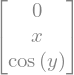

In [60]:
# Derivative of the vector elements with respect to y
# Should be [[0], [x], [cos(y)]]
v.diff(y)

Exercise 5

Goal: explicitly learn how to loop over matrix elements (important for custom constructions).

- Write a double loop that iterates over all elements of M.
- Construct a new matrix in which each element is the derivative with respect to x of the corresponding element of M.
- Simplify each matrix element during or after differentiation.


Differentiated matrix with respect to x


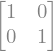

In [61]:
x, y = sp.symbols("x y")
m = sp.Matrix([[x, y], [y, x]])
m_new = sp.zeros(m.rows, m.cols)

for i in range(m.rows):
    for j in range(m.cols):
        m_new[i, j] = sp.simplify(sp.diff(m[i, j], x))

print("Differentiated matrix with respect to x")       
m_new

### Exercise 6

Goal: understand the Jacobian and construct it manually.

Consider the vector-valued function:

$F(x,y,z) = \begin{bmatrix}
x^{2}y \\
sin(xz) \\
yz + e^{x}
\end{bmatrix}$

- Define the vector function F
- Define the variables x,y,z as a vector
- Construct the 3x3 Jacobian with i and j exist in {x,y,z}  

$J_{ij} = \frac{\delta F_{i}}{\delta q_{j}}$

or written in its full form:

$\overline{\overline{J}} = \begin{bmatrix}
\frac{\partial f_{1}}{\partial f_{x}},  \frac{\partial f_{1}}{\partial f_{y}}, \frac{\partial f_{1}}{\partial f_{z}}\\
\frac{\partial f_{2}}{\partial f_{x}},  \frac{\partial f_{2}}{\partial f_{y}}, \frac{\partial f_{2}}{\partial f_{z}}\\
\frac{\partial f_{3}}{\partial f_{x}},  \frac{\partial f_{3}}{\partial f_{y}}, \frac{\partial f_{3}}{\partial f_{z}}\\
\end{bmatrix}$

- Do this:
    - (a) using an explicit double loop
    - (b) using built-in Sympy functionality

- Compare both results and simplify the Jacobian


In [62]:
def get_jacobian(matrix: sp.Matrix, variables: Sequence[sp.Symbol]) -> sp.Matrix:
    """
    Creates the Jacobian matrix from a given vector (or a "Nx1 matrix") and N variables
    
    :param matrix: vector with the coordinate relations between the coordinate systems
    :type matrix: sp.Matrix
    :param variables: variables belonging to one "old" coordinate system
    :type variables: Sequence[sp.Symbol]
    :return: the Jacobian matrix with shape (NxN)
    :rtype: sp.Matrix
    """
    J = sp.zeros(matrix.rows, matrix.rows)
    
    for i in range(matrix.rows):
        for j in range(matrix.rows):
            J[i,j] = sp.diff(matrix[i], variables[j])
    
    return J

In [63]:
x, y, z = sp.symbols("x y z")
m = sp.Matrix([
    x**2*y, 
    sp.sin(x*y),
    y*z + sp.exp(x)
    ])

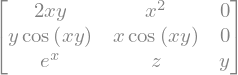

In [64]:

J = get_jacobian(m, (x, y, z))
    
J

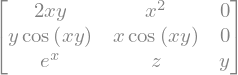

In [65]:
# Built-in
J_builtin = m.jacobian((x, y, z))
J_builtin

### Exercise 7

Goal: to perform polar and spherical coordinate transformations using Jacobians.

- Define the Cartesian coordinates (x,y) and the polar coordinates (r,θ) with the relations:
    - $x = r \cos(\theta)$
    - $y = r \sin(\theta)$
- Construct the Jacobian J_polar = ∂(x,y)/∂(r,θ)

- Repeat the same for spherical coordinates (x,y,z) and (r,θ,φ) with the relations:
    - $x = r \sin(\theta) \cos(\phi)$
    - $y = r \sin(\theta) \sin(\phi)$
    - $z = r \cos(\theta)$

In [66]:
x, y, z = sp.symbols("x y z")
r, theta, phi = sp.symbols("r theta phi")

cartesian = sp.Matrix([x,y,z])
polar = sp.Matrix([
    r*sp.cos(theta),
    r*sp.sin(theta),
])

spherical = sp.Matrix([
    r*sp.sin(theta)*sp.cos(phi),
    r*sp.sin(theta)*sp.sin(phi),
    r*sp.cos(theta)
    ])

J_polar = get_jacobian(polar, [r, theta])
print("Jacobian for polar coordinates:")
det = J_polar.det()
print(det)
det.simplify()

Jacobian for polar coordinates:
r*sin(theta)**2 + r*cos(theta)**2


In [67]:
J_spherical = get_jacobian(spherical, [r, theta, phi])

det = J_spherical.det()

print("Determinant of the Jacobian for spherical coordinates:")
print(det)
det.simplify()

Determinant of the Jacobian for spherical coordinates:
r**2*sin(phi)**2*sin(theta)**3 + r**2*sin(phi)**2*sin(theta)*cos(theta)**2 + r**2*sin(theta)**3*cos(phi)**2 + r**2*sin(theta)*cos(phi)**2*cos(theta)**2


## General Relativity Exercises

### Metric Tensor and Jacobians

- Using the Jacobians from Exercise 7, compute the metric tensor in polar and spherical coordinates starting from the Euclidean metric in Cartesian coordinates


Metric tensor (simplified) in polar coordinates:


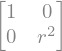

In [76]:
g_cartesian = sp.Matrix([
    [1, 0],
    [0, 1]
    ])

metric_tensor_polar = J_polar.T * g_cartesian * J_polar
for i in range(metric_tensor_polar.rows):
    for j in range(metric_tensor_polar.cols):
        metric_tensor_polar[i, j] = sp.simplify(metric_tensor_polar[i, j])

print("Metric tensor (simplified) in polar coordinates:")
metric_tensor_polar